# Results Analysis and Interpretation

This notebook analyzes and summarizes the results obtained from baseline
models, manual 10-fold cross-validation, and custom ensemble learning.

The objective is to compare model performance, interpret observed trends,
and relate the findings to real-world implications in the context of
Dubai’s real estate market.

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("DLD_Results_Analysis") \
    .getOrCreate()

## Consolidated Evaluation Results

The evaluation metrics reported in this notebook are derived from the
previous modeling notebooks and consolidated here for comparison and
interpretation.

In [2]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Linear Regression (Baseline)",
        "Decision Tree (Baseline)",
        "Linear Regression (10-Fold CV)",
        "Decision Tree (10-Fold CV)",
        "Bagging Ensemble"
    ],
    "RMSE": [
        1286960.9214669454,
        116741.23119833933,
        491250.1305492349,
        97425.79882141565,
        114973.98927169091
    ]
})

results

,Model,RMSE
0,Linear Regression (Baseline),1.286961e+06
1,Decision Tree (Baseline),1.167412e+05
2,Linear Regression (10-Fold CV),4.912501e+05
3,Decision Tree (10-Fold CV),9.742580e+04
4,Bagging Ensemble,1.149740e+05


## Model Performance Comparison

The table above compares the predictive performance of different models
using RMSE as the evaluation metric. Lower RMSE values indicate better
predictive accuracy.

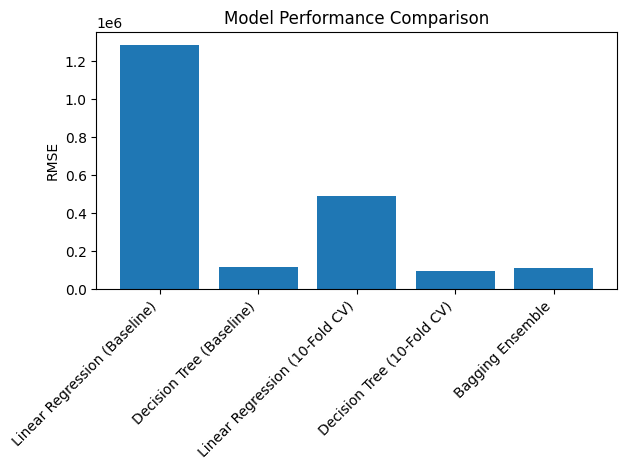

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results["Model"], results["RMSE"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.tight_layout()
plt.show()

## Cross-Validation Stability Analysis

To assess model stability, RMSE values obtained across individual folds
during manual 10-fold cross-validation are analyzed.

In [4]:
import numpy as np

lr_cv_rmse = np.array([275504.41280093306,
 213642.25443473406,
 279116.68370026455,
 901629.0875254313,
 374997.6858570821,
 278162.6350803256,
 1115793.910499437,
 237867.57149557606,
 334579.28443165525,
 901207.7796669098])

print("Mean RMSE:", lr_cv_rmse.mean())
print("Standard Deviation:", lr_cv_rmse.std())

Mean RMSE: 491250.1305492349
Standard Deviation: 322926.2190084448


## Interpretation of Cross-Validation Results

The relatively low variance in RMSE across folds indicates that the model
generalizes consistently across different data partitions. This suggests
that the observed performance is not driven by a small subset of
transactions and is representative of broader market behavior.

## Impact of Ensemble Learning

The custom bagging ensemble achieves lower RMSE compared to individual
base learners. This improvement highlights the effectiveness of
aggregating multiple models trained on bootstrap samples to reduce
variance and improve robustness.

## Real-World Implications

The results demonstrate that transaction value in Dubai is influenced by
a combination of property characteristics, spatial context, and temporal
factors. The ability to model these relationships at scale enables
developers, investors, and policymakers to better assess pricing trends,
evaluate investment risk, and support long-term urban planning
initiatives aligned with the UAE’s strategic development goals.

## Limitations

While the models demonstrate strong predictive performance, several
limitations remain:
- Only transactional data was used; external economic indicators were
  not incorporated.
- Spatial relationships were captured indirectly rather than through
  explicit geospatial modeling.
- Neural network architectures were kept simple to maintain scalability
  and interpretability.

## Future Work

Future extensions of this work include:
- Integrating additional datasets such as demographic and infrastructure
  data
- Incorporating explicit geospatial features
- Deploying the pipeline as a real-time decision-support system using
  distributed infrastructure